In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [3]:
# Wine dataset
df = pd.read_csv('/Users/StevenZhao/Desktop/winequality-red.csv', sep=";" )
df['label'] = df['quality'] >= 6
df = df*1
y = df['label']
del df['label']
del df['quality']
x = df

In [7]:
x  = df.rename(columns={"fixed acidity": "fixed acidity(x0)", "volatile acidity": "volatile acidity(x1)",
                       "citric acid":"citric acid(x2)", "residual sugar":"residual sugar(x3)",
                        "chlorides":"chlorides(x4)","free sulfur dioxide":"free sulfur dioxide(x5)",
                        "total sulfur dioxide":"total sulfur dioxide(x6)","density":"density(x7)",
                        "pH":"pH(x8)","sulphates":"sulphates(x9)","alcohol":"alcohol(x10)"})
x

,fixed acidity(x0),volatile acidity(x1),citric acid(x2),residual sugar(x3),chlorides(x4),free sulfur dioxide(x5),total sulfur dioxide(x6),density(x7),pH(x8),sulphates(x9),alcohol(x10)
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


roc_auc_score for Decision Tree:  0.7499102204984558
Accuracy for Decision Tree:  0.7178030303030303
              precision    recall  f1-score   support

           0       0.69      0.82      0.75       273
           1       0.76      0.61      0.68       255

    accuracy                           0.72       528
   macro avg       0.73      0.71      0.71       528
weighted avg       0.72      0.72      0.71       528

[[224  49]
 [100 155]]


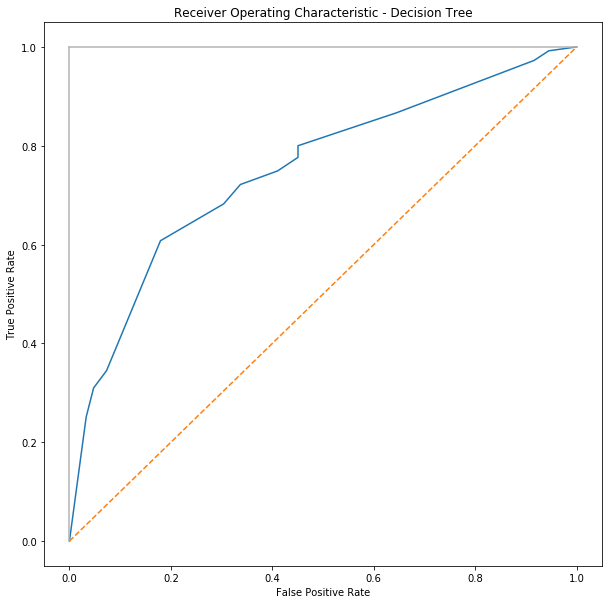

In [8]:
# Decision Tree Model
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=50)
clf4 = DecisionTreeClassifier(max_depth = 4)
clf4.fit(X_train, y_train)
y_score4 = clf4.predict_proba(X_test)[:,1]
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(y_test, y_score4)
confusion_matrix4 = confusion_matrix(y_test, clf4.predict(X_test))
print('roc_auc_score for Decision Tree: ', roc_auc_score(y_test, y_score4))
print('Accuracy for Decision Tree: ', clf4.score(X_test, y_test))
print(classification_report(y_test,clf4.predict(X_test)))
print(confusion_matrix4)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.plot(false_positive_rate4, true_positive_rate4)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

[Text(418.5, 733.86, 'X[10] <= 9.975\ngini = 0.493\nsamples = 1071\nvalue = [471, 600]'),
 Text(209.25, 570.78, 'X[1] <= 0.548\ngini = 0.431\nsamples = 432\nvalue = [296, 136]'),
 Text(104.625, 407.70000000000005, 'X[9] <= 0.645\ngini = 0.496\nsamples = 199\nvalue = [108, 91]'),
 Text(52.3125, 244.62, 'X[10] <= 9.85\ngini = 0.437\nsamples = 118\nvalue = [80, 38]'),
 Text(26.15625, 81.54000000000008, 'gini = 0.419\nsamples = 114\nvalue = [80, 34]'),
 Text(78.46875, 81.54000000000008, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(156.9375, 244.62, 'X[4] <= 0.089\ngini = 0.452\nsamples = 81\nvalue = [28, 53]'),
 Text(130.78125, 81.54000000000008, 'gini = 0.278\nsamples = 48\nvalue = [8, 40]'),
 Text(183.09375, 81.54000000000008, 'gini = 0.478\nsamples = 33\nvalue = [20, 13]'),
 Text(313.875, 407.70000000000005, 'X[6] <= 99.0\ngini = 0.312\nsamples = 233\nvalue = [188, 45]'),
 Text(261.5625, 244.62, 'X[6] <= 72.5\ngini = 0.353\nsamples = 192\nvalue = [148, 44]'),
 Text(235.40625, 81.54

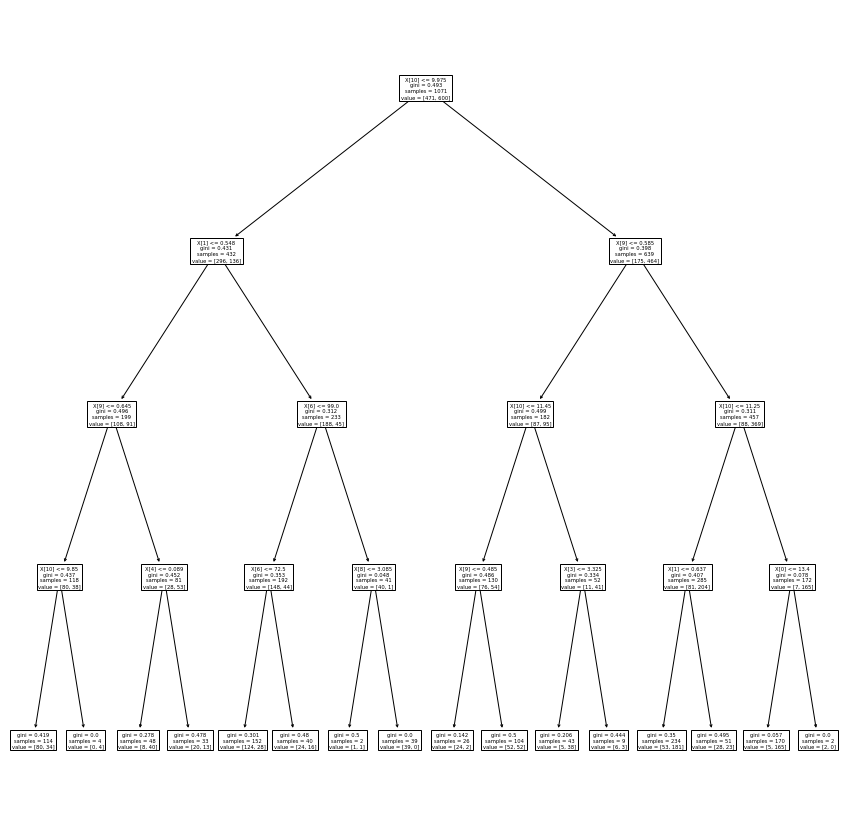

In [9]:
fig, ax = plt.subplots(1, figsize=(15,15))
tree.plot_tree(clf4, ax = ax)

roc_auc_score for XG Boost:  0.7499102204984558
Accuracy for XG Boost:  0.7140151515151515
              precision    recall  f1-score   support

           0       0.75      0.66      0.71       273
           1       0.68      0.77      0.72       255

    accuracy                           0.71       528
   macro avg       0.72      0.72      0.71       528
weighted avg       0.72      0.71      0.71       528

[[181  92]
 [ 59 196]]


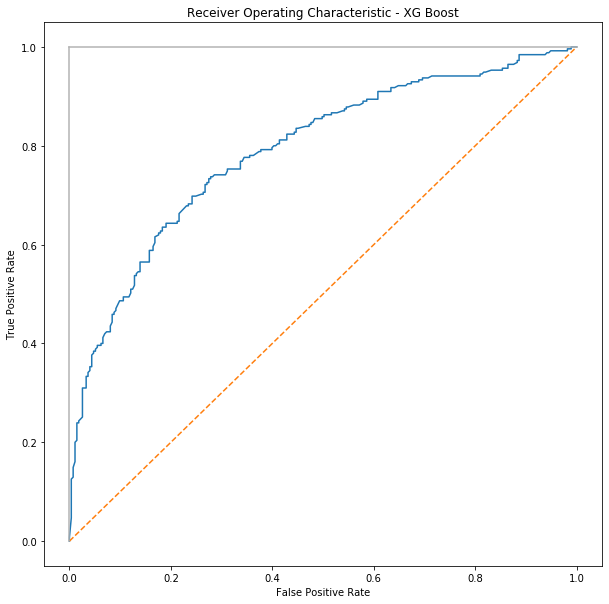

In [10]:
# XG-boost
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=50)
xg_clas = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 10)
xg_clas.fit(X_train,y_train)
preds = xg_clas.predict(X_test)
y_score5 = xg_clas.predict_proba(X_test)[:,1]
false_positive_rate5, true_positive_rate5, threshold5 = roc_curve(y_test, y_score5)
confusion_matrix5 = confusion_matrix(y_test, xg_clas.predict(X_test))
print('roc_auc_score for XG Boost: ', roc_auc_score(y_test, y_score4))
print('Accuracy for XG Boost: ', xg_clas.score(X_test, y_test))
print(classification_report(y_test,xg_clas.predict(X_test)))
print(confusion_matrix5)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - XG Boost')
plt.plot(false_positive_rate5, true_positive_rate5)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

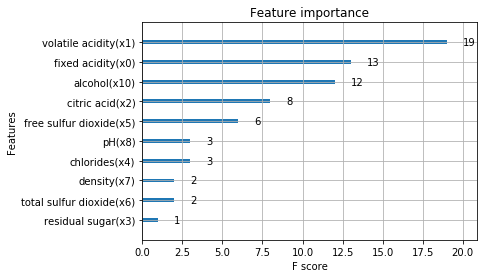

In [11]:
# xgb.plot_tree(xg_clas)
# plt.rcParams['figure.figsize'] = [20, 20]
# plt.show()

xgb.plot_importance(xg_clas)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [177]:
# 1. Data process
X_train, X_test, y_train, y_test = train_test_split(x.to_numpy(), y.to_numpy(), test_size=0.33, random_state=50)
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [196]:
# 2. NN model
learning_rate = 0.001
num_epochs = 10000
input_size = X_train.shape[1]
hidden_size = 20
num_class = 2

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_class):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        torch.nn.init.xavier_normal_(self.l1.weight, gain=1.0)
        self.l2 = nn.Linear(hidden_size, hidden_size)
        torch.nn.init.xavier_normal_(self.l2.weight, gain=1.0)
        self.Relu = nn.ReLU()
  
    def forward(self, x):
        out = self.l1(x)
        out = self.Relu(out)
        out = self.l2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_class)

# 3. loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 4. traing iteration
for epoch in range(num_epochs):
    # zero gradient
    optimizer.zero_grad()
    # forward path
    y_predicted = model(X_train)
    y_train = y_train.reshape(len(y_train),).long()
    # loss
    loss = criterion(y_predicted, y_train)
    # backward path
    loss.backward()
    # updates
    optimizer.step()
    if (epoch+1) % 1000 == 0:
        print(f'epoch: {epoch+1}, loss: {loss.item():.4f}')

with torch.no_grad():
    outputs = model(X_test)
    # max returns (value ,index)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = predicted.eq(y_test.reshape(len(y_test),)).sum() / float(len(y_test))
    print(f'Accuracy of Neural Network is {accuracy:.4f}')

epoch: 1000, loss: 0.5138
epoch: 2000, loss: 0.4942
epoch: 3000, loss: 0.4870
epoch: 4000, loss: 0.4798
epoch: 5000, loss: 0.4697
epoch: 6000, loss: 0.4665
epoch: 7000, loss: 0.4645
epoch: 8000, loss: 0.4628
epoch: 9000, loss: 0.4613
epoch: 10000, loss: 0.4589
Accuracy of Neural Network is 0.7045


In [197]:
print(classification_report(y_test,predicted))
print(confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.72      0.70      0.71       273
         1.0       0.69      0.71      0.70       255

    accuracy                           0.70       528
   macro avg       0.70      0.70      0.70       528
weighted avg       0.71      0.70      0.70       528

[[190  83]
 [ 73 182]]
